In [23]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns

## Import data base and clean up

In [24]:
prot_file = 'breastcancerproteomes/77_cancer_proteomes_CPTAC_itraq.csv'

**File: 77_cancer_proteomes_CPTAC_itraq.csv**

1. RefSeq_accession_number: RefSeq protein ID (each protein has a unique ID in a RefSeq database)
2. gene_symbol: a symbol unique to each gene (every protein is encoded by some gene)
3. gene_name: a full name of that gene Remaining columns: log2 iTRAQ ratios for each sample (protein expression data, most important)
4. **three last columns are from healthy individuals**

In [81]:
proteome = pd.read_csv(prot_file)
print('the dimension of this dataset is ', proteome.shape)
proteome.head()
# first three columns are protein/gene infromation

the dimension of this dataset is  (12553, 85)


,Unnamed: 0,RefSeq_accession_number,TCGA-AO-A12D,TCGA-C8-A131,TCGA-AO-A12B,TCGA-BH-A18Q,TCGA-C8-A130,TCGA-C8-A138,TCGA-E2-A154,TCGA-C8-A12L,...,TCGA-AO-A12B.1,TCGA-A2-A0SW,TCGA-AO-A0JL,TCGA-BH-A0BV,TCGA-A2-A0YM,TCGA-BH-A0C7,TCGA-A2-A0SX,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,0,NP_958782,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,1.407570,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,1,NP_958785,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.407570,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,2,NP_958786,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,3,NP_000436,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,1.407570,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,4,NP_958781,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,1.413053,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747


In [26]:
clinic_file = 'breastcancerproteomes/clinical_data_breast_cancer.csv'

**File: clinical_data_breast_cancer.csv**
1. First column "Complete TCGA ID" is used to match the sample IDs in the main cancer proteomes file. 
2. All other columns have self-explanatory names, contain data about the cancer classification of a given sample using different methods.

In [27]:
clinic = pd.read_csv(clinic_file, index_col=0)
print('the dimension of clinic file is ', clinic.shape)
# clinic.head()

the dimension of clinic file is  (105, 29)


** The TCGA_IDs don't match between two datasets, thus, change the name accordingly to fit the complete TCGA_ID format**

In [28]:
original_name = list(proteome.columns)
def change_TCGA_ID(name):
    return name[-4:] + '-' + name[:7]
modified_name = original_name[:3] + [change_TCGA_ID(_) for _ in original_name[3: -3]] + original_name[-3:]

In [29]:
# change the format
proteome.columns = modified_name

In [30]:
# check if the TCGA_ID format is correct in the proteome dataframe
proteome.head()

,RefSeq_accession_number,gene_symbol,gene_name,TCGA-AO-A12D,TCGA-C8-A131,TCGA-AO-A12B,TCGA-BH-A18Q,TCGA-C8-A130,TCGA-C8-A138,TCGA-E2-A154,...,TCGA-AO-A12B,TCGA-A2-A0SW,TCGA-AO-A0JL,TCGA-BH-A0BV,TCGA-A2-A0YM,TCGA-BH-A0C7,TCGA-A2-A0SX,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,NP_958785,NaN,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,PLEC,plectin isoform 1a,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,NP_000436,NaN,plectin isoform 1c,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,NP_958781,NaN,plectin isoform 1e,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747


In [31]:
# save this pd into a temp csv file
proteome.to_csv('77_cancer_proteomes_CPTAC_itraq.csv_with_changed_name.csv')

### Merge two datasets together for ML analysis later

In [95]:
# re-read the dataset and change the index of proteome to RefSeq_accession_number
proteome = pd.read_csv('77_cancer_proteomes_CPTAC_itraq.csv_with_changed_name.csv', index_col=0)
# drop the gene symbol and gene_name
proteome.drop(['gene_symbol', 'gene_name'], axis=1, inplace=True)

In [96]:
# transpose the proteosome to prepare for merging
proteome = proteome.transpose()
proteome.columns = proteome.ix[0, :]
proteome=proteome.ix[1:, :]
proteome.head()
proteome.to_csv('77_cancer_proteomes_CPTAC_itraq_transposed.csv')

In [34]:
# Drop the clinical samples that are not in the protein data set
clinic = clinic.loc[[_ for _ in clinic.index.tolist() if _ in proteome.index], :]
# clinic.head()

In [35]:
# merge two datasets together and save it as a temp csv
merge_proteome_clinic = proteome.merge(clinic,left_index=True,right_index=True)
merge_proteome_clinic.to_csv('merge_proteome_clinic.csv')

### Prepare data for ML

In [36]:
merge = pd.read_csv('merge_proteome_clinic.csv', index_col=0)
#merge.head()

In [37]:
# proteome here will be the features for ML later
proteome = merge.ix[:, :12553]
#proteome.head()

In [38]:
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values='NaN', strategy='median', axis=1)
imputer = imputer.fit(proteome)
processed_proteome = imputer.transform(proteome)

In [39]:
X = processed_proteome

In [40]:
merge['PAM50 mRNA'] = merge['PAM50 mRNA'].astype('category')
merge['PAM50_mRNA_label'] = merge['PAM50 mRNA'].cat.codes

In [119]:
y = merge['PAM50_mRNA_label'].values

### Use t-sne and PCA to visualize data structure before ML

In [42]:
import sklearn
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

In [43]:
# import modules for t-sne or PCA from scikit learn
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# transform the dataset via two method
X_tsne = TSNE(random_state = 42, perplexity=30, learning_rate=100).fit_transform(X)
X_pca = PCA().fit_transform(X)
# notice here we are focusing on different strains of yeast, each point in the figure represent one strain
# Notice t-sne works really good in terms of seperation while PCA works pretty terrible

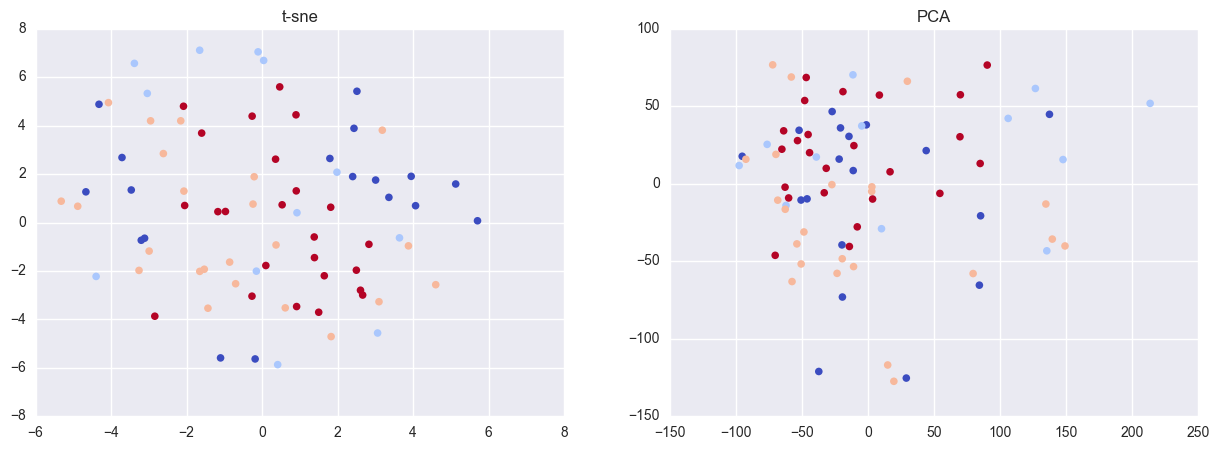

In [120]:
# plot out the result
fig = plt.figure(figsize=(15, 5))
ax1 = plt.subplot(121)
ax1.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=1, s=30, lw=0, c=y, cmap = 'coolwarm')
ax1.set_title('t-sne')
ax2 = plt.subplot(122)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], alpha = 1, s=30, lw=0, c=y, cmap = 'coolwarm')
ax2.set_title('PCA')
plt.show()

### Playing with t-sne
I read an interesting paper about Drop-Seq data analysis using t-sne to identify different types of cells according to transcriptome.    
This represent a potential approach that I could use for my project later on.  
**Here, I will test this approach and write it up from 'bottom up'.**

*ref: http://www.cell.com/cell/abstract/S0092-8674(15)00549-8*

In [45]:
# plotting out the t-sne with labels at the geometric center of different group of patients
def temp_scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 4))

    # We create a scatter plot.
    f = plt.figure(figsize=(6, 6))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    labels = ['Basal-like', 'HER2', 'LumA', 'LumB']
    txts = []
    for i in range(4):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, labels[i], fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [46]:
X_proj = TSNE(random_state=42,learning_rate=100, perplexity=50).fit_transform(X)

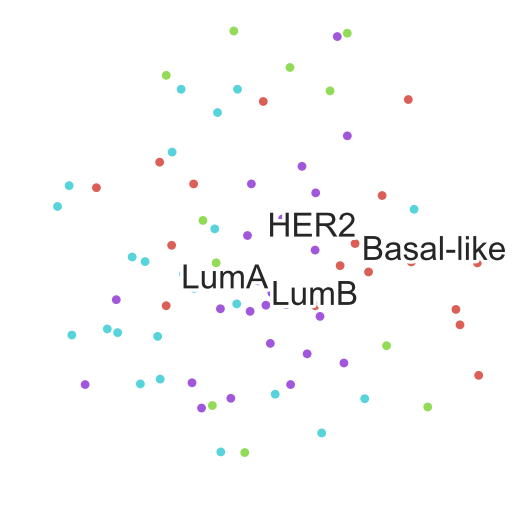

In [47]:
temp_scatter(X_proj, y)
plt.show()

In [48]:
# monkey-patch the _gradient_descent()
positions = []

# from https://github.com/scikit-learn/scikit-learn/blob/14031f6/sklearn/manifold/t_sne.py#L497
# Dec 25 2017 version
def _gradient_descent(objective, p0, it, n_iter, objective_error=None,
                      n_iter_check=1, n_iter_without_progress=50,
                      momentum=0.5, learning_rate=1000.0, min_gain=0.01,
                      min_grad_norm=1e-7, min_error_diff=1e-7, verbose=0,
                      args=None, kwargs=None):
    if args is None:
        args = []
    if kwargs is None:
        kwargs = {}

    p = p0.copy().ravel()
    update = np.zeros_like(p)
    gains = np.ones_like(p)
    error = np.finfo(np.float).max
    best_error = np.finfo(np.float).max
    best_iter = 0

    for i in range(it, n_iter):
        # save the current position
        positions.append(p.copy())
        
        new_error, grad = objective(p, *args, **kwargs)
        grad_norm = linalg.norm(grad)

        inc = update * grad >= 0.0
        dec = np.invert(inc)
        gains[inc] += 0.05
        gains[dec] *= 0.95
        np.clip(gains, min_gain, np.inf)
        grad *= gains
        update = momentum * update - learning_rate * grad
        p += update

        if (i + 1) % n_iter_check == 0:
            if new_error is None:
                new_error = objective_error(p, *args)
            error_diff = np.abs(new_error - error)
            error = new_error

            if verbose >= 2:
                m = "[t-SNE] Iteration %d: error = %.7f, gradient norm = %.7f"
                print(m % (i + 1, error, grad_norm))

            if error < best_error:
                best_error = error
                best_iter = i
            elif i - best_iter > n_iter_without_progress:
                if verbose >= 2:
                    print("[t-SNE] Iteration %d: did not make any progress "
                          "during the last %d episodes. Finished."
                          % (i + 1, n_iter_without_progress))
                break
            if grad_norm <= min_grad_norm:
                if verbose >= 2:
                    print("[t-SNE] Iteration %d: gradient norm %f. Finished."
                          % (i + 1, grad_norm))
                break
            if error_diff <= min_error_diff:
                if verbose >= 2:
                    m = "[t-SNE] Iteration %d: error difference %f. Finished."
                    print(m % (i + 1, error_diff))
                break

        if new_error is not None:
            error = new_error

    return p, error, i
sklearn.manifold.t_sne._gradient_descent = _gradient_descent

In [49]:
X_proj = TSNE(random_state=42,learning_rate=10, perplexity=50).fit_transform(X)

In [50]:
X_iter = np.dstack(position.reshape(-1, 2) for position in positions)

In [51]:
X_iter.shape

(77, 2, 125)

** something wrong with moviepy, use a hacky way here to show how the t-sne work visually**
~~~~
for i in range(125):
    f, ax, sc, txts = scatter(X_iter[..., i], y)
    f.savefig(str(i))
    
import os
png_list = [_ for _ in os.listdir() if _[-3:] == 'png']

def getint(name):
    basename = name.split('.')[0]
    num = basename
    return int(num)
png_list.sort(key=getint)

import imageio
images = []
for filename in png_list:
    images.append(imageio.imread(filename))
imageio.mimsave('movie.gif', images)
~~~~

<img src="movie.gif">

### Choose the right features

In [52]:
pam_file = 'breastcancerproteomes/PAM50_proteins.csv'

In [53]:
pam = pd.read_csv(pam_file)
pam.head()

,GeneSymbol,RefSeqProteinID,Species,Gene Name
0,MIA,NP_006524,Homo sapiens,melanoma inhibitory activity
1,FGFR4,NP_002002,Homo sapiens,fibroblast growth factor receptor 4
2,FGFR4,NP_998812,Homo sapiens,fibroblast growth factor receptor 4
3,FGFR4,NP_075252,Homo sapiens,fibroblast growth factor receptor 4
4,GPR160,NP_055188,Homo sapiens,G protein-coupled receptor 160


In [102]:
prot_file = '77_cancer_proteomes_CPTAC_itraq_transposed.csv'
proteome_pam = pd.read_csv(prot_file, index_col=0)
proteome_pam.head()

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001193600,NP_061134,NP_932347,NP_003593,NP_997203,NP_001191293,NP_775791,NP_004065,NP_068752,NP_219494
TCGA-AO-A12D,1.096131,1.111370,1.111370,1.107561,1.115180,1.107561,1.111370,1.111370,-1.517390,0.482754,...,NaN,NaN,NaN,-0.340163,NaN,NaN,NaN,NaN,-0.633517,12.666488
TCGA-C8-A131,2.609943,2.650422,2.650422,2.646374,2.646374,2.646374,2.650422,2.650422,3.909313,-1.045294,...,NaN,NaN,NaN,3.451902,NaN,NaN,NaN,NaN,4.840325,0.140736
TCGA-AO-A12B,-0.659828,-0.648742,-0.654285,-0.632113,-0.640428,-0.654285,-0.648742,-0.648742,-0.618256,1.222003,...,NaN,NaN,NaN,-1.718531,NaN,NaN,NaN,NaN,-1.965192,-2.854835
TCGA-BH-A18Q,0.195341,0.215413,0.215413,0.205377,0.215413,0.215413,0.215413,0.215413,-1.035760,-0.517226,...,0.048144,NaN,-0.881872,2.527072,-8.111243,-16.029761,-2.046065,-1.778435,NaN,-3.069752
TCGA-C8-A130,-0.494060,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,...,1.457462,NaN,1.710012,0.296389,-1.753529,1.729692,-0.425182,-0.149673,NaN,-0.047997


In [101]:
# proteome_pam.columns = proteome_pam.ix[0, :]
# proteome_pam = proteome_pam.ix[:, 1:]
# proteome_pam.head()

,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,NP_076965,...,NP_001193600,NP_061134,NP_932347,NP_003593,NP_997203,NP_001191293,NP_775791,NP_004065,NP_068752,NP_219494
TCGA-AO-A12D,1.111370,1.111370,1.107561,1.115180,1.107561,1.111370,1.111370,-1.517390,0.482754,0.261785,...,NaN,NaN,NaN,-0.340163,NaN,NaN,NaN,NaN,-0.633517,12.666488
TCGA-C8-A131,2.650422,2.650422,2.646374,2.646374,2.646374,2.650422,2.650422,3.909313,-1.045294,-0.037371,...,NaN,NaN,NaN,3.451902,NaN,NaN,NaN,NaN,4.840325,0.140736
TCGA-AO-A12B,-0.648742,-0.654285,-0.632113,-0.640428,-0.654285,-0.648742,-0.648742,-0.618256,1.222003,1.019685,...,NaN,NaN,NaN,-1.718531,NaN,NaN,NaN,NaN,-1.965192,-2.854835
TCGA-BH-A18Q,0.215413,0.215413,0.205377,0.215413,0.215413,0.215413,0.215413,-1.035760,-0.517226,-0.724639,...,0.048144,NaN,-0.881872,2.527072,-8.111243,-16.029761,-2.046065,-1.778435,NaN,-3.069752
TCGA-C8-A130,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,-0.703971,...,1.457462,NaN,1.710012,0.296389,-1.753529,1.729692,-0.425182,-0.149673,NaN,-0.047997


In [103]:
proteome_p50 = proteome_pam.ix[:,proteome_pam.columns.isin(pam['RefSeqProteinID'])]
proteome_p50.shape

(83, 43)

In [104]:
merge_p50 = proteome_p50.merge(clinic,left_index=True,right_index=True)
merge_p50.head()
merge_p50.to_csv('merge_p50.csv')

In [132]:
proteome_p50 = merge_p50.ix[:, :43]
imputer = Imputer(missing_values='NaN', strategy='median', axis=1)
imputer = imputer.fit(proteome_p50)
X_p50 = imputer.transform(proteome_p50)

In [133]:
merge_p50['PAM50 mRNA'] = merge_p50['PAM50 mRNA'].astype('category')
merge_p50['PAM50_mRNA_label'] = merge_p50['PAM50 mRNA'].cat.codes

In [134]:
y_p50 = merge_p50['PAM50_mRNA_label'].values

In [146]:
X_p50_tsne = TSNE(random_state = 42, perplexity=30, learning_rate=30).fit_transform(X_p50)
X_p50_pca = PCA().fit_transform(X_p50)

In [147]:
len(X_p50_tsne)

77

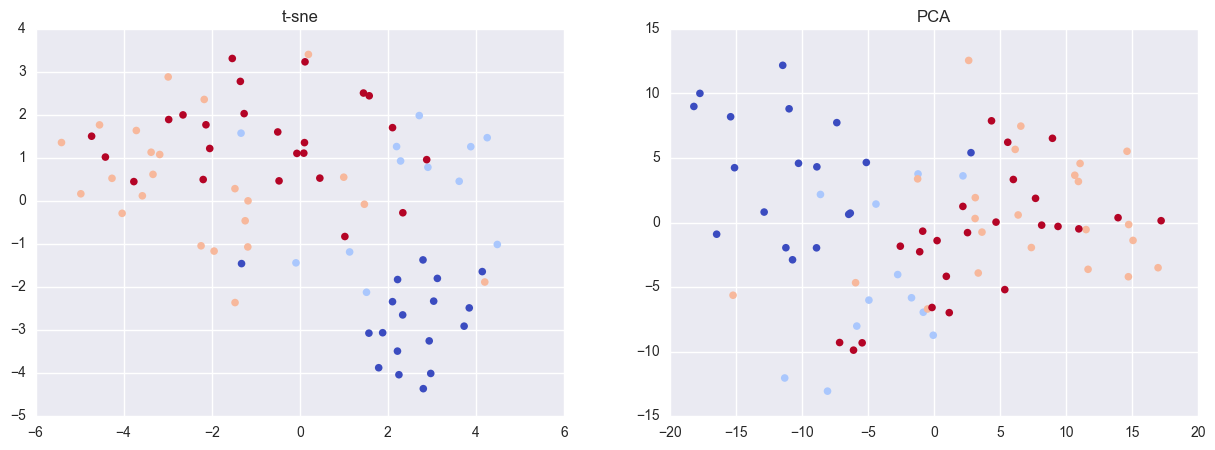

In [148]:
fig = plt.figure(figsize=(15, 5))
ax1 = plt.subplot(121)
ax1.scatter(X_p50_tsne[:, 0], X_p50_tsne[:, 1], alpha=1, s=30, lw=0, c=y_p50, cmap = 'coolwarm')
ax1.set_title('t-sne')
ax2 = plt.subplot(122)
ax2.scatter(X_p50_pca[:, 0], X_p50_pca[:, 1], alpha = 1, s=30, lw=0, c=y_p50, cmap = 'coolwarm')
ax2.set_title('PCA')
plt.show()

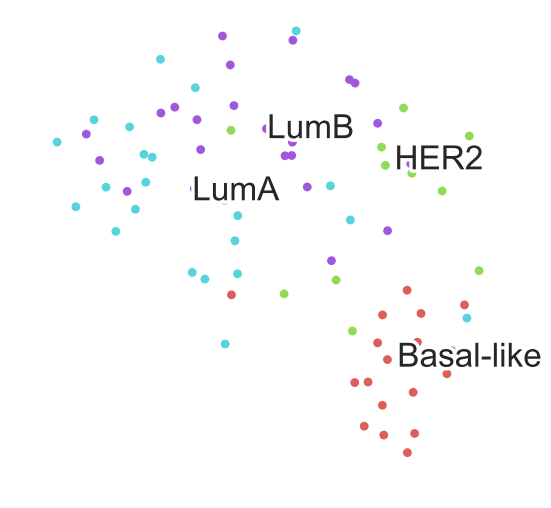

In [150]:
temp_scatter(X_p50_tsne, y)
plt.show()

<img src="movie2.gif">

### ML to predict